In [1]:
from packages import *

## GET WRFOUT FILES

In [2]:
#### GET the SPIN UP FILES

input_path = '/bsuhome/stanleyakor/scratch/thompson/'
input_file = 'thompson_spinup_sliced.nc'
in_var_name = 'SNOWH'
out_var_name = 'SNOWH'
operator = 'mean'
description = 'Mean accumulated snow height'
units = 'm'
rain_bucket_vol = 100

accumulated_snowh_thompson = hourly_to_daily(input_path, input_file, in_var_name,\
                                             out_var_name, operator, description, units, rain_bucket_vol)


#accumulated_snowh_wsm6 = hourly_to_daily(input_path, input_file, in_var_name,\
#                                             out_var_name, operator, description, units, rain_bucket_vol)

In [3]:
geog = xr.open_dataset(input_path+input_file)

In [4]:

lat = geog['XLAT'].isel(Time=0)
lon = geog['XLONG'].isel(Time=0)

In [5]:
## MEAN SNOWH ON MARCH 1, Thompson

ds_thompson_snowh =accumulated_snowh_thompson['SNOWH'].mean(dim = 'XTIME')

## GET SNODAS SNOWH FILES

In [6]:
# %%bash
# cd
# cd /bsuhome/stanleyakor/scratch/NOHRSC_SNODAS/download_data/nc
# ls S*



In [7]:
path3 = '/bsuhome/stanleyakor/scratch/NOHRSC_SNODAS/download_data/nc/SNWZ_snodas_2023*'

In [8]:
ds_snodas=xr.open_mfdataset(path3, combine='nested', concat_dim='time', parallel=True)
ds_snodas= ds_snodas.swap_dims({'time': 'XTIME'})

In [9]:
#MEAN ACCUMULATED SNOW HEIGHT AT ON MARCH 1.
ds_snodas_snowh = ds_snodas['SNWZ'].mean(dim = 'XTIME')*0.001

## GET PLOTS

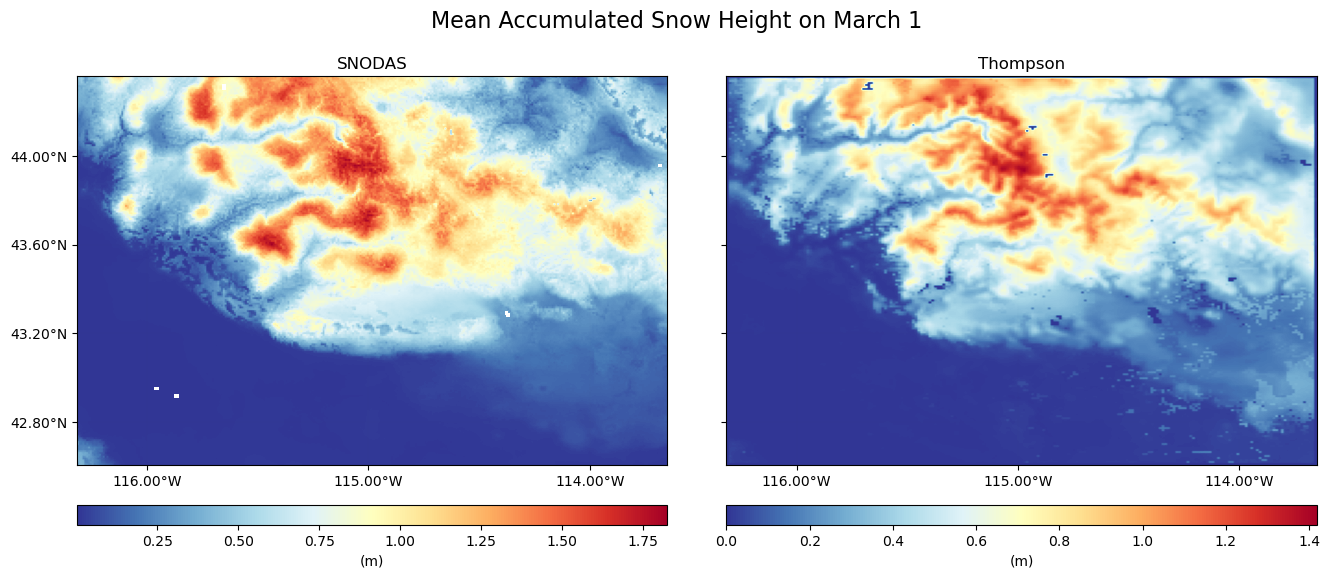

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

file_list = [ds_snodas_snowh, ds_thompson_snowh]
title = ['SNODAS', 'Thompson']

# Set up figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Loop through the subplots
for i, ax in enumerate(axs):
    im = ax.imshow(file_list[i], extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='RdYlBu_r', origin='lower', alpha=1.0)
    ax.set_title(title[i])
    ax.xaxis.set_major_locator(plt.MultipleLocator(base=1.0))
    ax.yaxis.set_major_locator(plt.MultipleLocator(base=0.4))

    # Modify latitude and longitude labels
    lon_ticks = ax.get_xticks()
    lat_ticks = ax.get_yticks()
    lon_labels = [f'{abs(lon):.2f}°{"W" if lon < 0 else "E"}' for lon in lon_ticks]
    lat_labels = [f'{abs(lat):.2f}°{"S" if lat < 0 else "N"}' for lat in lat_ticks]

    ax.set_xticklabels(lon_labels)
    ax.set_yticklabels(lat_labels)

    if i == 1:
        ax.yaxis.set_ticklabels([])  # Hide y-axis labels for the interior left subplot

    # Add gridlines
    ax.grid(color='gray', linestyle='--', linewidth=0.005)

    # Create a colorbar with the same width as the plot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.4)
    plt.colorbar(im, cax=cax, orientation='horizontal', label="(m)")


# Add the main title for the entire plot
plt.suptitle('Mean Accumulated Snow Height on March 1', fontsize=16)
    
# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1)
plt.savefig('snowdas_scheme.pdf', dpi=500)
plt.show()
